In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np

In [2]:
#Import data
fraud_check = pd.read_csv ("C:/Users/0004IW744/Desktop/Python/Assignments/14.Decision Tree/Fraud_check.csv")

In [3]:
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [4]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


No Null Values

In [5]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_check.isna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


No NA Values

# Correlation

In [7]:
fraud_check.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

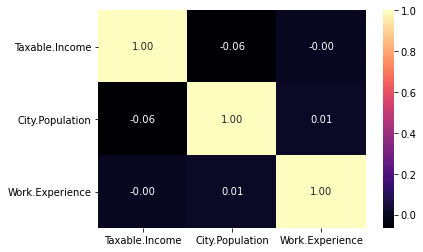

In [9]:
corr = fraud_check.corr()
import seaborn as sns
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")

In [8]:
fraud_check.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [9]:
fraud_check['status'] = fraud_check['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [10]:
fraud_check.head()

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


# Visualization

<AxesSubplot:>

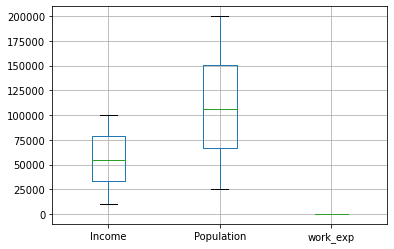

In [11]:
fraud_check.boxplot()

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'work_exp'}>, <AxesSubplot:>]],
      dtype=object)

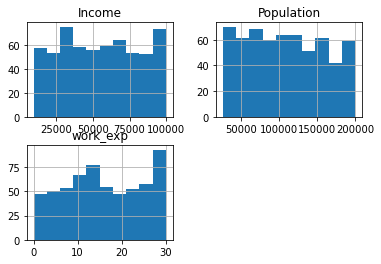

In [12]:
fraud_check.hist()

# Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
fraud_check.iloc[:, 0] = labelencoder.fit_transform(fraud_check.iloc[:,0])
fraud_check.iloc[:, 1] = labelencoder.fit_transform(fraud_check.iloc[:,1])
fraud_check.iloc[:, 5] = labelencoder.fit_transform(fraud_check.iloc[:,5])
fraud_check.iloc[:, 6] = labelencoder.fit_transform(fraud_check.iloc[:,6])

In [15]:
fraud_check

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [73]:
x = fraud_check.iloc[:,0:5]
y = fraud_check.iloc[:,5]

In [65]:
x

,Undergrad,marital_status,Income,Population,work_exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [75]:
y.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [74]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 40)

In [76]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(450, 5) (150, 5) (450,) (150,)


# Building Decision Tree Classifier using Entropy Criteria

In [77]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

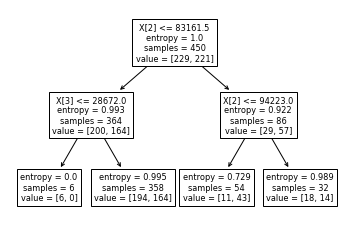

In [78]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)
tree.plot_tree(model);

In [79]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    133
1     17
dtype: int64

In [80]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban,,
0,62,7
1,71,10


In [81]:
# Accuracy 
np.mean(preds==y_test)

0.48

# Building Decision Tree Classifier (CART) using Gini Criteria


In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

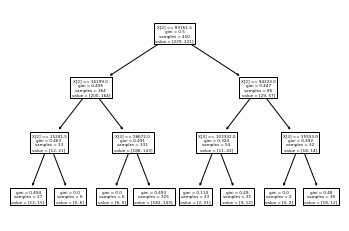

In [84]:
# Plotting Decision tree
tree.plot_tree(model_gini);

In [85]:
#Prediction and computing the accuracy
pred=model.predict(x_test)

In [86]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
Urban,,
0,62,7
1,71,10


In [87]:
# Checking accuracy of model
print('accuracy is',model_gini.score(x_test, y_test)*100)


accuracy is 52.0
